# Kurze Einführung in die CaseStudy:
Diese case study zielt darauf ab, den FiveThirtyEight Candy Power Ranking-Datensatz zu untersuchen.
Ich bin daran interessiert zu verstehen, welche Bonboneigenschaften ihre Leistung im Gewinnprozentsatz
gegenüber Konkurrenten beeinflussen.

Zuerst werde ich mit einer explorativen Datenanalyse des Datensatzes beginnen und 
den Einfluss jedes Merkmals in der Zielvariablen separat mit Hilfe der Datenvisualisierung bewerten.
Dann werde ich mit einem klassischen OLS fortfahren, um die Auswirkungen der einzelnen Eigenschaften 
von Süßigkeiten zu verstehen, wobei andere Eigenschaften konstant bleiben.

In [8]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    document.body.style.fontFamily='Palatino';
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

In [9]:
# Importing necessary python libraries
import pandas as pd
import numpy as np
import tkinter
import io
import requests
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.use('TkAgg')
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm
import pandas_profiling
import plotly.express as px

In [10]:
#Importing data from github
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv" 
data = requests.get(url).content

#Reading the downloaded content and turning it into a pandas dataframe
df_candy = pd.read_csv(io.StringIO(data.decode('utf-8')))

# Primäre Datenanalyse

In [11]:
#Checking for Null or missing values in dataset
df_candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
# #An overview of data with help of Pandas profiling report
# profile = df_candy.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="pandas_profiling_Candies.html")

In [12]:
#Sorting the dataframe with winpercent
df_candy_new = df_candy.sort_values(by='winpercent',ascending=False)
df_candy_new.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


* Versuchen Sie zu verstehen, welche Eigenschaften von Süßigkeiten dazu führen, 
  dass sie im Matchup gegen andere Süßigkeiten mehr als 50% gewinnen

In [13]:
#checking effect of bool features on winpercent on sorted Data Frame
feature=['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
df_candy_toppers=df_candy_new[df_candy_new['winpercent']>=50]
occurrences=df_candy_toppers[feature].sum().sort_values(ascending=False)
occurrences

chocolate           28
bar                 17
pluribus            17
peanutyalmondy      12
fruity              11
caramel             10
crispedricewafer     6
nougat               5
hard                 1
dtype: int64

Text(0.5, 1.0, 'Number of occurrences and Win percent')

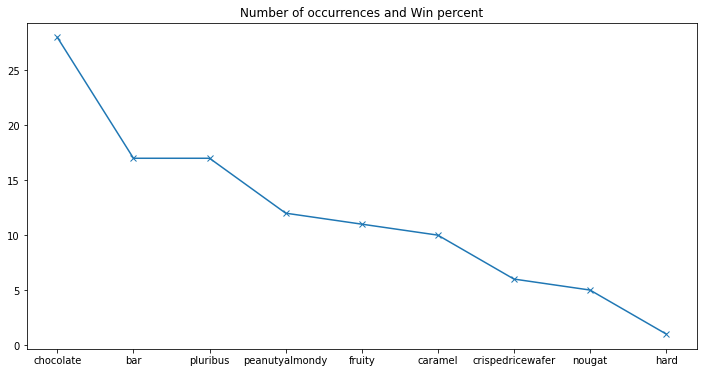

In [14]:
plt.figure(figsize=(12,6))
occurrences.plot(marker='x')
plt.title('Number of occurrences and Win percent')

Takeaways aus der obigen Handlung:
*Aus dem obigen Diagramm gewinnen wir einen ersten Eindruck, dass Bonbons mit einem Gewinnprozentsatz von über 50 % hauptsächlich Schokolade oder/und Pluribus, 
 Erdnüsse und Mandeln enthalten und meistens eine Riegelform haben.

### Unten ist die Verteilung von Gewinnprozent und Zuckerprozent in Bonbons, Gewinnprozent ist normal verteilt und Zuckerprozent ist gleichmäßig verteilt (keine perfekte gleichmäßige Verteilung, weitere Analyse erforderlich).

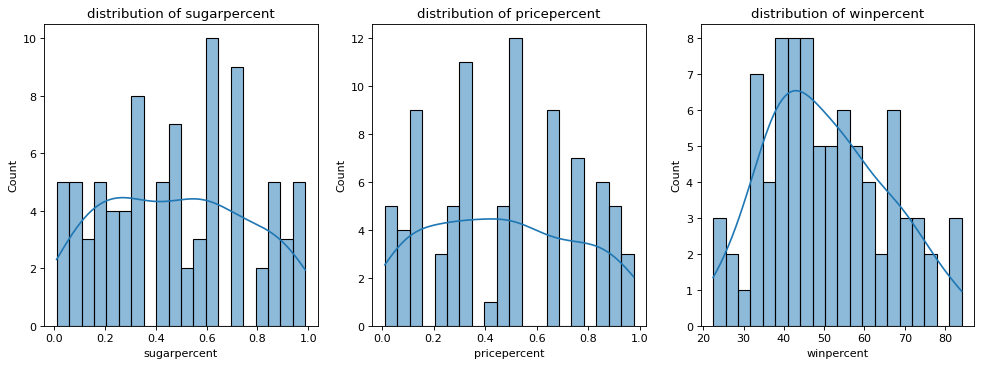

In [15]:

#Plotting Sugar Percent's distribution
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,3,1)
sns.histplot(df_candy['sugarpercent'],bins=20,kde=True)
plt.title("distribution of sugarpercent")

#Plotting Price Percent's distribution
plt.subplot(1,3,2)
sns.histplot(df_candy['pricepercent'],bins=20,kde=True)
plt.title("distribution of pricepercent")

#Plotting Win Percent's distribution
plt.subplot(1,3,3)
sns.histplot(df_candy['winpercent'],bins=20,kde=True)
plt.title("distribution of winpercent")
plt.show()

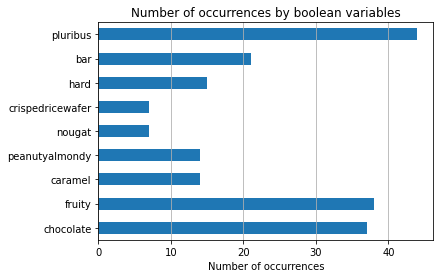

In [16]:
#Frequency of a feature in dataset
df_candy[feature].sum().plot.barh()
plt.xlabel("Number of occurrences")
plt.grid(axis='x')
plt.title("Number of occurrences by boolean variables")
plt.show();

* Die höhere Anzahl von Vorkommen für Schokoladen-, Frucht-, Pluribus- und Riegelbonbons.
* Nougat und knusprige Reiswaffeln sind im Vergleich zu anderen Zutaten in einer sehr geringeren Anzahl von Süßigkeiten enthalten. Daher ich
  werden es vorerst vermeiden, ihre Auswirkungen auf die Gewinnprozente zu kommentieren.

### Analysieren jedes booleschen Merkmals mit Hilfe von Pie Chart und Violin Plot

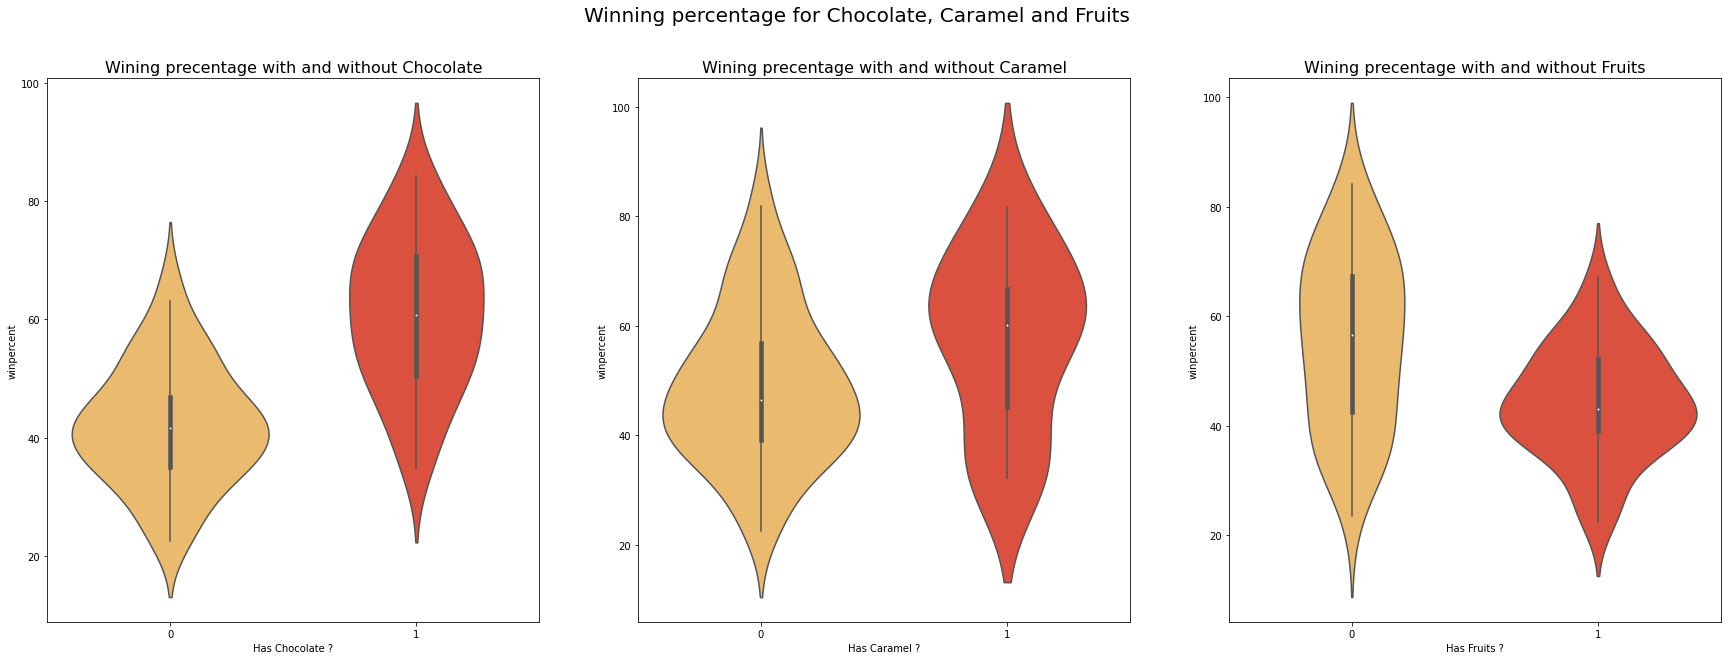

In [17]:

plt.figure(figsize=(30,10))

plt.suptitle("Winning percentage for Chocolate, Caramel and Fruits", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without Chocolate",fontsize=16)
sns.violinplot(data=df_candy,x="chocolate",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Chocolate ?")

plt.subplot(1,3,2)
plt.title("Wining precentage with and without Caramel",fontsize=16)
sns.violinplot(data=df_candy,x="caramel",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Caramel ?")

plt.subplot(1,3,3)
plt.title("Wining precentage with and without Fruits",fontsize=16)
sns.violinplot(data=df_candy,x="fruity",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Fruits ?")

plt.show()

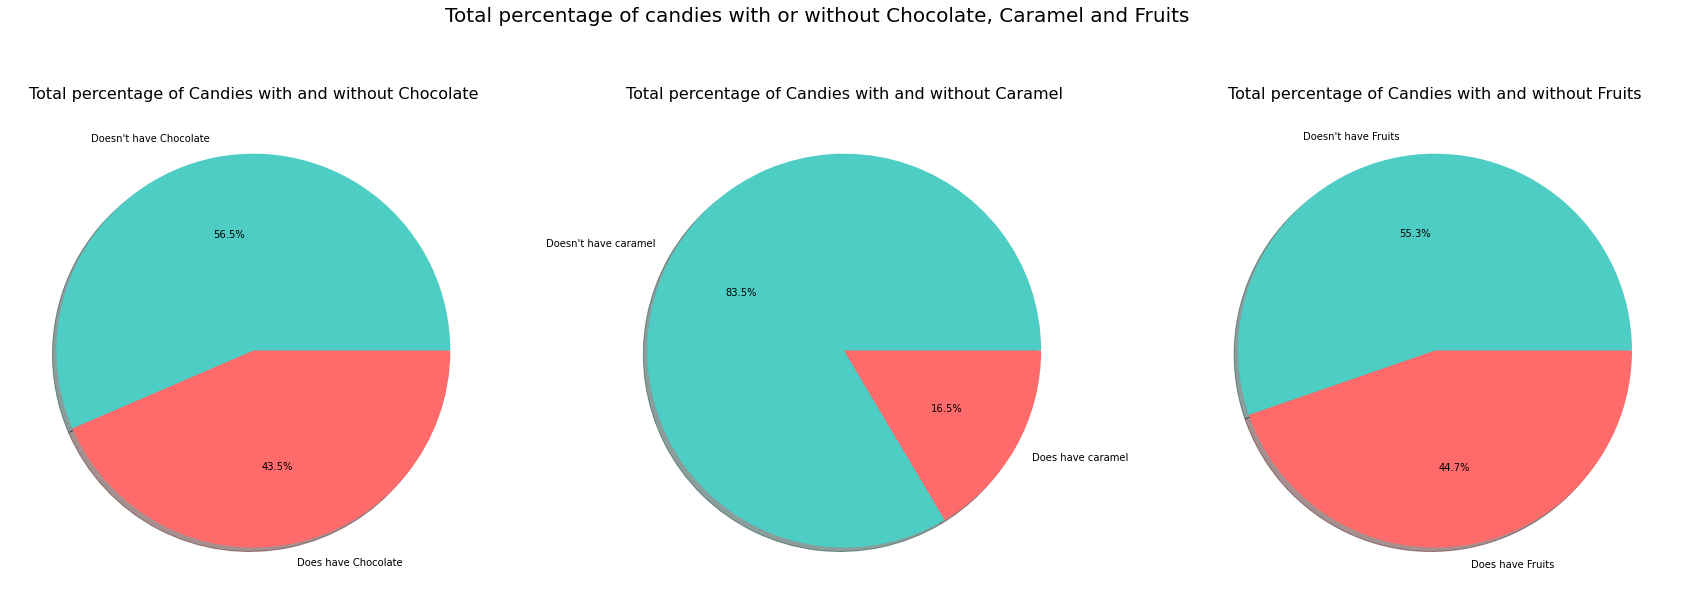

In [18]:

plt.figure(figsize=(30,10))

plt.suptitle("Total percentage of candies with or without Chocolate, Caramel and Fruits", fontsize=20)


plt.subplot(1,3,1)
plt.title("Total percentage of Candies with and without Chocolate",fontsize=16)
plt.pie(df_candy.chocolate.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have Chocolate","Does have Chocolate"],shadow=True)

plt.subplot(1,3,2)
plt.title("Total percentage of Candies with and without Caramel",fontsize=16)
plt.pie(df_candy.caramel.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have caramel","Does have caramel"],shadow=True)


plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Fruits",fontsize=16)
plt.pie(df_candy.fruity.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have Fruits","Does have Fruits"],shadow=True)

plt.show()

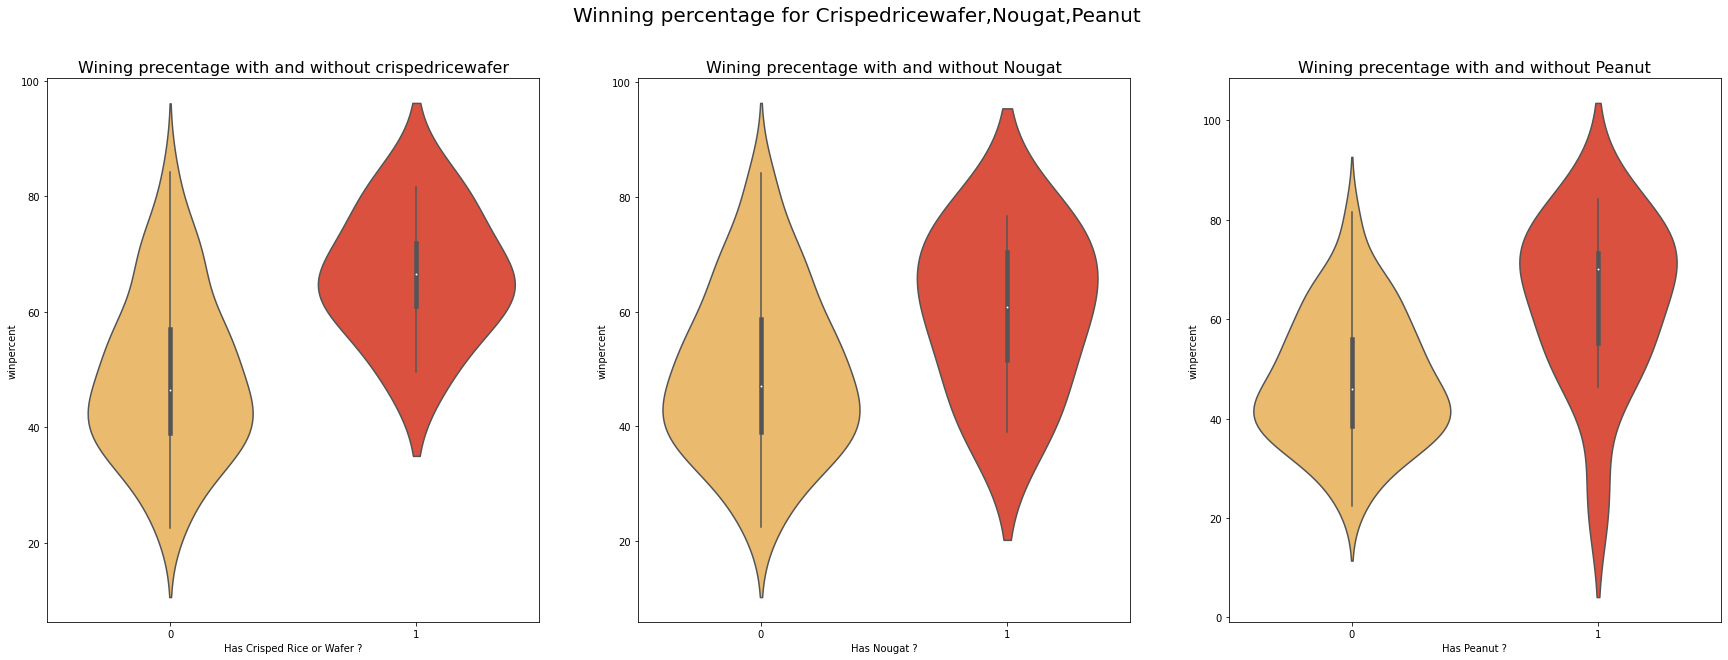

In [19]:

plt.figure(figsize=(30,10))

plt.suptitle("Winning percentage for Crispedricewafer,Nougat,Peanut", fontsize=20)

plt.subplot(1,3,1)
plt.title("Wining precentage with and without crispedricewafer",fontsize=16)
sns.violinplot(data=df_candy,x="crispedricewafer",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Crisped Rice or Wafer ?")

plt.subplot(1,3,2)
plt.title("Wining precentage with and without Nougat",fontsize=16)
sns.violinplot(data=df_candy,x="nougat",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Nougat ?")

plt.subplot(1,3,3)
plt.title("Wining precentage with and without Peanut",fontsize=16)
sns.violinplot(data=df_candy,x="peanutyalmondy",y="winpercent",color="brown",palette="YlOrRd")
plt.xlabel("Has Peanut ?")



plt.show()

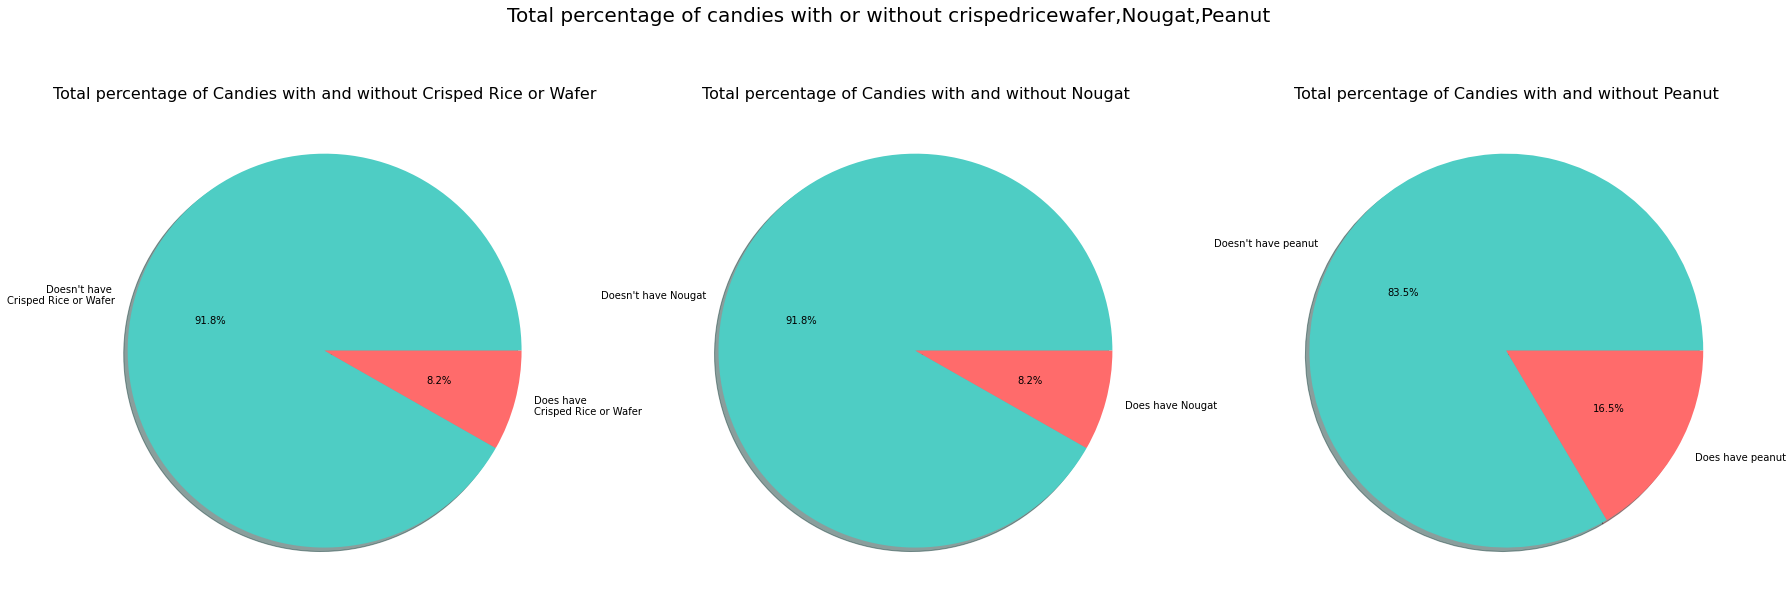

In [20]:
plt.figure(figsize=(30,10))

plt.suptitle("Total percentage of candies with or without crispedricewafer,Nougat,Peanut", fontsize=20)

plt.subplot(1,3,1)
plt.title("Total percentage of Candies with and without Crisped Rice or Wafer",fontsize=16)
plt.pie(df_candy.crispedricewafer.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have \nCrisped Rice or Wafer","Does have \nCrisped Rice or Wafer"],shadow=True)

plt.subplot(1,3,2)
plt.title("Total percentage of Candies with and without Nougat",fontsize=16)
plt.pie(df_candy.nougat.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have Nougat","Does have Nougat"],shadow=True)

plt.subplot(1,3,3)
plt.title("Total percentage of Candies with and without Peanut",fontsize=16)
plt.pie(df_candy.peanutyalmondy.value_counts(), autopct='%1.1f%%',colors=["#4ECDC4","#FF6B6B"],labels=["Doesn't have peanut","Does have peanut"],shadow=True)


plt.show()

### Vergleich der Gewinnprozente der Konkurrenten (Beobachtung aus dem Diagramm unten):
    * Sieht so aus, als ob die meisten Gewinner in diesem Wettbewerb Reese's Peanut Butter Cup, Reese's Miniatures, Twix, Kitkat und Snickers sind..


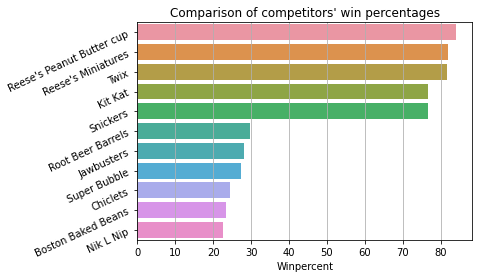

In [21]:
df_comp = df_candy.loc[:, ['competitorname', 'winpercent']].sort_values(
    by='winpercent', ascending=False).reset_index(drop=True)
df_comp.competitorname = df_comp.competitorname.str.replace('Õ', "\'")
df_comp = df_comp[(df_comp.winpercent > 76) | (df_comp.winpercent < 30)]
sns.barplot(x=df_comp['winpercent'], y=df_comp['competitorname'])
plt.xlabel("Winpercent")
plt.ylabel("")
plt.yticks(rotation=25)
plt.grid(axis='x')
plt.title("Comparison of competitors' win percentages")
plt.show()

### Überprüfung auf Korrelation zwischen Merkmalen

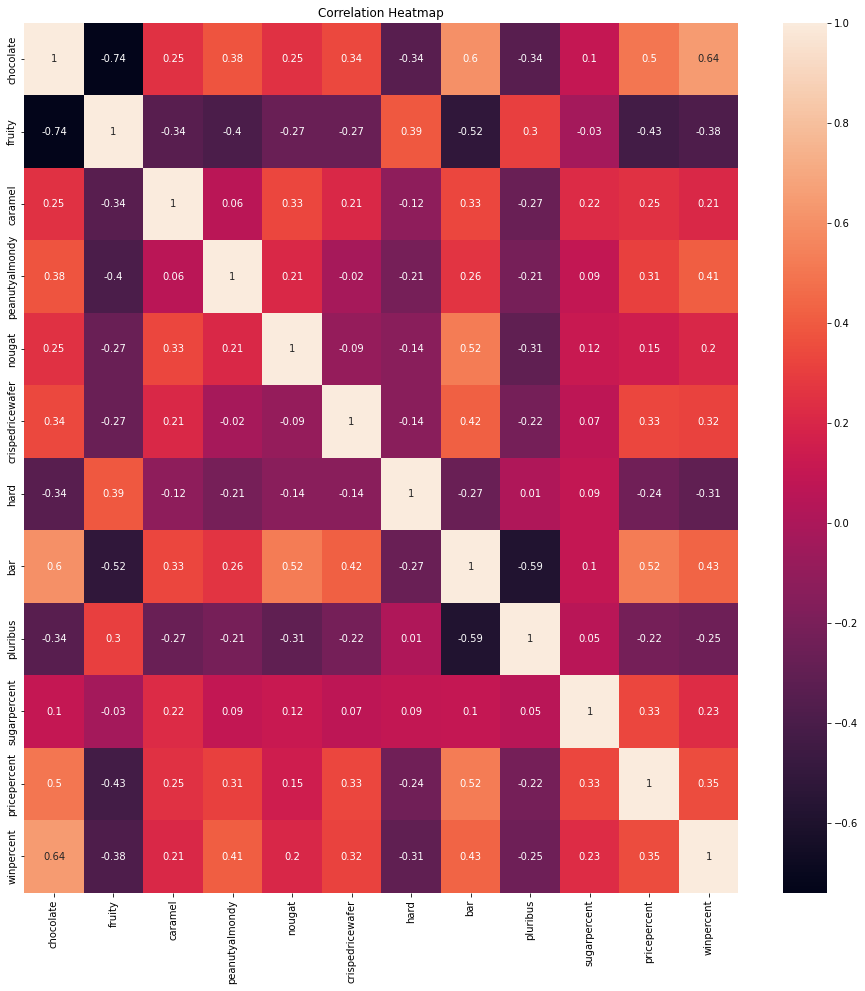

In [22]:
corr = df_candy.corr().round(decimals=2)
mask = np.zeros_like(corr)
plt.figure(figsize=(16,16))
sns.heatmap(data=corr, mask=mask, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [23]:

corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head()

,feature_1,feature_2,correlation
132,winpercent,chocolate,0.64
11,chocolate,winpercent,0.64
84,bar,chocolate,0.60
7,chocolate,bar,0.60
88,bar,nougat,0.52


<b> Beobachtungen aus obiger Heatmap:
* Wir können feststellen, dass „Gewinnprozent“ hauptsächlich mit zwei Merkmalen korreliert: „Schokolade“ und „Riegel“ und Schokoladengeschmack wird zu deutlich höheren Preisen verkauft.
* Sieht so aus, als mischen Firmen keinen schokoladigen und fruchtigen Geschmack in einer Süßigkeit
* Der Zuckergehalt ist in allen Kategorien sehr ausgewogen, mit Ausnahme des Preises (billigere Bonbons haben auch einen niedrigeren Zuckergehalt).
* Bonbons mit Fruchtgeschmack werden zu niedrigeren Preisen verkauft.

In [24]:
columns = [x for x in feature if x!='chocolate' and  x!='fruity']
df_new = pd.DataFrame(np.zeros((2, 7)), index=['chocolate', 'fruity'], columns=[columns])

for x in columns:
    df_new.loc['chocolate', x] = df_candy[(df_candy['chocolate']==True) & (df_candy[x]==True)].count()[0]
    df_new.loc['fruity', x] = df_candy[(df_candy['fruity']==True) & (df_candy[x]==True)].count()[0]
    
df_new

,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
chocolate,10.0,12.0,6.0,7.0,1.0,20.0,12.0
fruity,1.0,0.0,0.0,0.0,13.0,0.0,26.0


 <b> Beobachtungen aus obiger Tabelle:
* Fruchtiger Geschmack ist meist hart und enthält kein Nougat oder
   Erdnüsse/Mandeln.
* Bonbons mit Fruchtgeschmack werden nicht in Riegelform verkauft und sind nicht knusprig
* Der fruchtige Geschmack wird bei Pluribus im Vergleich zu Schokolade stärker kombiniert

### In den nächsten beiden Zellen versuche ich, den Einfluss kontinuierlicher Variablen wie „Zuckerprozent“ und „Preisprozent“ auf unsere Zielvariable „Gewinnprozent“ zu untersuchen.

<AxesSubplot:xlabel='sugarpercent', ylabel='winpercent'>

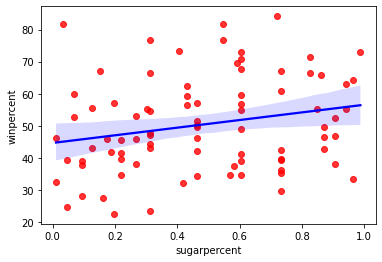

In [25]:
sns.regplot(x='sugarpercent',y='winpercent', data=df_candy, scatter_kws={'color':'red'},line_kws={'color':'blue'})

<AxesSubplot:xlabel='pricepercent', ylabel='winpercent'>

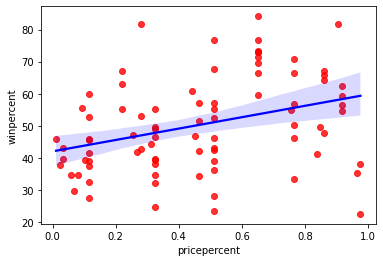

In [26]:

sns.regplot(x='pricepercent',y='winpercent', data=df_candy, scatter_kws={'color':'red'},line_kws={'color':'blue'})

# Multivariate Regressionsanalyse

Analyse der Auswirkungen jeweils eines Merkmals auf den Gewinnprozentsatz, wobei die anderen Merkmale einer Süßigkeit konstant gehalten werden.

In [27]:

#Target and predictors selection
features=[col for col in df_candy.columns[:] if col!='winpercent' and col!='competitorname']
reg_formula_str = 'winpercent' + ' ~ ' + ' + '.join(features)

#Model fitting
model_ols = sm.ols(formula=reg_formula_str, data=df_candy).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           9.50e-09
Time:                        19:17:32   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.5340      4.320  

* Bei gleichbleibenden anderen Merkmalen erhöht sich jedes Mal, wenn Schokoladengehalt zu den Süßigkeiten hinzugefügt wird, der Gewinnprozentsatz um 19,7481 [25,924 - 43,144] Einheiten
* Wenn andere Prädiktoren konstant gehalten werden, verringert jede zusätzliche Preiserhöhung den Gewinnprozentsatz im Durchschnitt um 5,9284 [-16,916 - 5,060] Einheiten
* Kommentare zu den Auswirkungen der Formen „bar“, „Pluribus“ und „Nougat“ sollten vermieden werden, da sie hohe p-Werte gemäß haben
   Ergebnisse des obigen Modells


<AxesSubplot:>

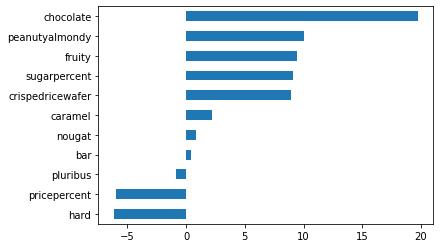

In [28]:
#Bar graph representation of trained model's parameter
model_ols.params[1:].sort_values().plot(kind='barh')

In [29]:
# Calculating Residuals 
predicted_win_percent = model_ols.predict(df_candy[features])
residuals = predicted_win_percent - df_candy.winpercent


In [30]:
#Checking root mean squared errors
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
print ('Root mean squared error for this model is :',RMSE)

Root mean squared error for this model is : 9.918632504457666


Text(0.5, 1.0, 'residuals density plot')

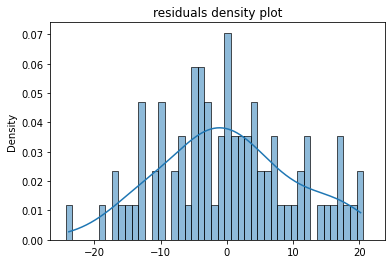

In [31]:
# Plotting Residuals
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

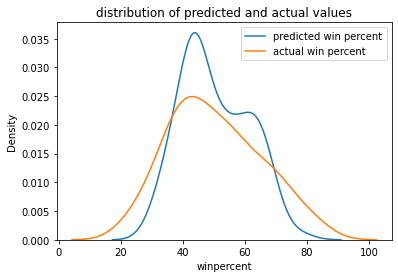

In [32]:
#Distribution of predicted and actual win percent
sns.kdeplot(predicted_win_percent, label='predicted win percent')
sns.kdeplot(df_candy.winpercent, label = 'actual win percent')
plt.title('distribution of predicted and actual values')
plt.legend()

<b> Combining features to see effect of various candy attributes

In [33]:
print('Chocolate and Peanutyalmond,  both are not present:')
df_candy.loc[(df_candy.chocolate==False) | (df_candy.peanutyalmondy==False),:].winpercent.describe()[:2]

Chocolate and Peanutyalmond,  both are not present:


count    73.000000
mean     47.327115
Name: winpercent, dtype: float64

In [34]:
print('Chocolate is not there but Peanutyalmondy flavor is present:')
df_candy.loc[(df_candy.chocolate==False) & (df_candy.peanutyalmondy==False),:].winpercent.describe()[:2]

Chocolate is not there but Peanutyalmondy flavor is present:


count    46.000000
mean     42.458998
Name: winpercent, dtype: float64

In [35]:
print('Chocolate and Peanutyalmondy flavor, both are present:')
df_candy.loc[(df_candy.chocolate==True) & (df_candy.peanutyalmondy==True) & (df_candy.sugarpercent>0.8),:].winpercent.describe()[:2]

Chocolate and Peanutyalmondy flavor, both are present:


count     2.000000
mean     72.176476
Name: winpercent, dtype: float64

## die Schließung

* Schokolade ist die größte erklärende Variable

* Die Form ist laut den Ergebnissen unseres Modells die am wenigsten erklärende Variable

* Abhängig von unserer Wahl des Merkmals können wir möglicherweise keine Rückschlüsse auf Variablen ziehen,       wenn ihre p-Werte zu hoch sind

* Insgesamt bleibt diese multivariate Regression statistisch signifikant, da ihre F-Statistiken viel größer als   1 sind (mindestens ein Merkmal hat einen sehr niedrigen p-Wert).

* Als nächsten Schritt können wir die zugrunde liegenden Annahmen eines linearen Regressionsmodells prüfen
  zum Beispiel auf Heteroskedastizität, Exogenität usw. prüfen.
  um sich der Zuverlässigkeit der Modellergebnisse sicher zu sein.

Thank you!

In [36]:
HTML('''<script>initialize();</script>Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.''')